In [1]:
import numpy as np
import imagehash
from PIL import Image
from sklearn.externals import joblib
import time
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rumor_pics_dir = '../../pics_filtered_img_rumor_todo'
pics_txt = '../pic_filtering_sift/file/pics_rumor_all_todo.txt'

with open(pics_txt, 'r') as src:
    lines = src.readlines()
image_paths = [rumor_pics_dir + '/' + line.strip('\n') for line in lines]
sz = len(image_paths)

sz

20802

In [4]:
matrix = joblib.load('pkl/matrix.pkl')

In [6]:
matrix.shape

(20802, 20802)

In [40]:
test = matrix.copy()

In [46]:
similarity_pics = []
for i in range(sz):
    array = test[i]
    if array[array > 0.75].shape[0] > 500:
        similarity_pics.append(image_paths[i])
        continue

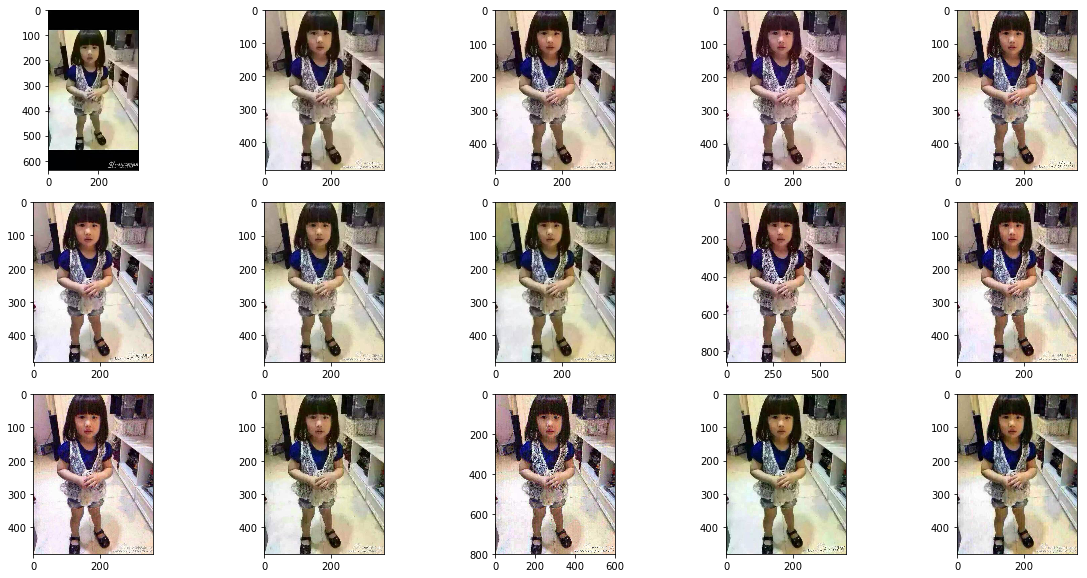

In [59]:
random_pics = random.sample(similarity_pics, 15)

plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(plt.imread(random_pics[i]))

## 查看聚类结果

In [3]:
from pic_filter import *

In [46]:
spc = joblib.load('pkl/phash_spc.pkl')

In [47]:
clusters = spc.cluster_list
n_list = [c.node_list for c in clusters]

In [48]:
n_list[0]

[0]

In [7]:
# # for i in range(random.randint(0, len(n_list)-1)):
# for i in range(len(n_list)):
#     if len(n_list[i]) > 10:
#         plt.figure(figsize=(20,10))
#         for j in range(10):
#             plt.subplot(2, 5, j + 1)
#             plt.imshow(plt.imread(image_paths[n_list[i][j]]))

In [51]:
# len(n_list[1])

In [50]:
# for i in range(12):
#     plt.subplot(2, 6, i + 1)
#     plt.imshow(plt.imread(image_paths[n_list[1][i]]))

In [52]:
len(image_paths)

20802

In [53]:
len(clusters)

13182

In [54]:
for i in range(sz*sz):
    nodes = random.sample(n_list, 1)[0]
    if len(nodes) < 10:
        continue

print(nodes)

KeyboardInterrupt: 

In [112]:
sz_of_n_list = [len(x) for x in n_list]
chosen_index = []
for s in sz_of_n_list:
    if s > 10:
        chosen_index.append(sz_of_n_list.index(s))

In [113]:
# nodes = n_list[random.sample(chosen_index, 1)[0]]
# print(nodes[:10])

# plt.figure(figsize=(20, 10))
# for i, node in enumerate(nodes[:10]):
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(plt.imread(image_paths[node]))

In [114]:
len(chosen_index)

135

In [115]:
filtered_num = 0
for c in chosen_index:
    filtered_num += len(n_list[c])

In [116]:
filtered_num

4100

### 执行mv命令

In [117]:
import os

In [119]:
for i, c in enumerate(chosen_index):
    nodes = n_list[c]
    for node in nodes:
        img = image_paths[node]
        os.system('cp {} {}'.format(img, '../../test/'+str(i)+'-'+img.split('/')[-1]))